# Get Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
dirThis = '/content/drive/MyDrive/1經濟學/專題/'
sys.path.append(dirThis + 'method/')
!pip install crucio
!pip install category_encoders
from function import *
dt = pd.read_csv(dirThis + 'featureNew/use.csv')
dat = dt.copy()
newdata = dataLoader(dat)
trainOriginal = newdata.getTrain()
testOriginal = newdata.getTest()
targetOriginal = newdata.getTarget()
data = newdata.getData()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Show Score

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

def score(m, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")

# Split Data

In [20]:
encode = 'onehot'
st = 'none'
over = 'none'
X_train, X_test, y_train, y_test = newdata.getSet(encode = encode, st = st, over = over)
from crucio import MTDF, SMOTE, ADASYN, ICOTE, MWMOTE, TKRKNN 

# trainTest, testTest, targetTest, ttargetTest = newdata.getSet(encode = encode, st = st, over = 'none')

# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2)

encoder : onehot


In [ ]:
method = MTDF()
newTrain = method.balance(X_train.join(y_train), 'repeater').reset_index(drop = True)
y_train = newTrain['repeater']
X_train = newTrain.drop(['repeater'], axis = 1)

/usr/local/lib/python3.10/dist-packages/crucio/MTDF.py:115: RuntimeWarning: divide by zero encountered in log
  a = uset - skewL * np.sqrt(-2 * (variance / len(self.df[self.df[self.target] == minority_class])) * np.log(norm.cdf(a)))


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128045, 371)
(32012, 371)
(128045,)
(32012,)


In [ ]:
train1, test1, target1, testTarget1 = train_test_split(trainOriginal, targetOriginal, test_size = 0.2, random_state = 777)
ch = False
print(targetOriginal.value_counts(normalize = ch))
print(target1.value_counts(normalize = ch))
print(testTarget1.value_counts(normalize = ch))

repeater
0           93295
1           34750
dtype: int64
repeater
0           74647
1           27789
dtype: int64
repeater
0           18648
1            6961
dtype: int64


In [ ]:
tt = pd.concat([y_train, y_test], axis = 0)

In [ ]:
ch = False
print(tt.value_counts(normalize = ch))
print(y_train.value_counts(normalize = ch))
print(y_test.value_counts(normalize = ch))

repeater
0           116619
1            43438
dtype: int64
repeater
0           93295
1           34750
dtype: int64
repeater
0           23324
1            8688
dtype: int64


In [ ]:
model

RandomForestClassifier(n_estimators=700)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import time
# from sklearn.feature_selection import RFE

# model = RandomForestClassifier(n_estimators=700)
# rfe = RFE(model, 4)
# start = time.process_time()
# RFE_X_Train = rfe.fit_transform(X_train, y_train)
# RFE_X_Test = rfe.transform(X_Test)
# rfe = rfe.fit(RFE_X_Train,Y_Train)
# print(time.process_time() - start)
# print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 20)
rfeX = rfe.fit_transform(X_train, y_train)

In [ ]:
feature_names = X_train.columns[rfe.get_support()]
select = feature_names
select

Index(['offer', 'buy_total_OZ', 'buy_total_amount_90', 'buy_total_amount_120',
       'buy_total_amount_150', 'buy_total_amount_180', 'buy_total_OZ_180',
       'buy_company_amount_90', 'buy_brand_amount_90',
       'buy_category_amount_90', 'buy_company_amount_120',
       'buy_brand_amount_120', 'buy_category_amount_120',
       'buy_company_amount_150', 'buy_brand_amount_150',
       'buy_category_amount_150', 'buy_company_amount_180',
       'buy_brand_amount_180', 'buy_brand_OZ_180', 'buy_category_amount_180'],
      dtype='object')

## Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(X_train.columns,
               mutual_info_classif(X_train, y_train)
               ))

sortDict = sorted(res.items(), key=lambda x:x[1], reverse = True)

In [ ]:
for i, j in enumerate(sortDict) :
    print(str(i+1) + ' - ' + str(j))

In [ ]:
select = []
for j in sortDict :
    if(j[1] > 0.001) :
      select.append(j[0])

print(select)

In [ ]:
len(select)

big train

In [ ]:
X_train = train
y_train = target

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)

print(clf.feature_importances_)
print(X_new)

In [ ]:
print(clf.feature_importances_)

[0.00848524 0.00600084 0.00755527 0.00520154 0.00729473 0.0069106
 0.00743944 0.00824588 0.00836587 0.00687468 0.00737933 0.00464544
 0.00675159 0.00678781 0.00675574 0.00676324 0.00680411 0.0015752
 0.00659906 0.006525   0.00669112 0.00654465 0.00680341 0.00186537
 0.00642798 0.00644485 0.00649729 0.00626293 0.00674588 0.00206656
 0.00635528 0.00630242 0.00645844 0.0062361  0.00655974 0.00240045
 0.00621    0.00639164 0.00631622 0.00617446 0.00646811 0.00271138
 0.00625337 0.00637029 0.00639655 0.00623183 0.00657916 0.00300603
 0.00463462 0.00482634 0.00452481 0.00509478 0.00187964 0.00456103
 0.         0.00355578 0.00370218 0.00355799 0.00396745 0.0015421
 0.00346002 0.         0.00527274 0.00550856 0.00517862 0.00571942
 0.00149507 0.00509943 0.         0.00669914 0.00680833 0.00668992
 0.00666713 0.00680077 0.00160861 0.00666246 0.00691387 0.00667338
 0.00672458 0.00689862 0.00158701 0.00666748 0.00686072 0.00669511
 0.00666336 0.00690038 0.00159065 0.00662953 0.00660544 0.0066222

In [ ]:
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [ ]:
!pip install minepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from minepy import MINE
m = MINE()
select = []

for i in range(len(X_train.columns)) :
  m.compute_score(X_train.iloc[:, i].T.to_numpy(), y_train.T.to_numpy()[0])
  colname = X_train.iloc[:, i].name
  if(m.mic() > 0.001) :
    select.append(colname)
  print(m.mic())

0.0049388588569757525
0.0008942470299348086
0.0014221997987396407
0.000168799076010016


In [ ]:
select

0.0014221997987396407


# Shallow ML Logisitic Test

## Without PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts)
clf_original.fit(X_train, y_train)
y_pred = clf_original.predict(X_test)
# 測 試 資 料 之 準 確 率 回 報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_original.score(X_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

In [ ]:
score(clf_original, X_train, y_train, trainTest, targetTest, False)

In [42]:
select = [
 'buy_total_amount',
 'buy_total_freq',
 'buy_total_daydiff',
 'buy_total_CT',
 'buy_total_OZ',
 'buy_total_LT',
 'buy_total_amount_30',
 'buy_total_freq_30',
 'buy_total_CT_30',
 'buy_total_OZ_30',
 'buy_total_LT_30',
 'buy_total_amount_60',
 'buy_total_freq_60',
 'buy_total_CT_60',
 'buy_total_OZ_60',
 'buy_total_LT_60',
 'buy_total_amount_90',
 'buy_total_freq_90',
 'buy_total_CT_90',
 'buy_total_OZ_90',
 'buy_total_LT_90',
 'buy_total_amount_120',
 'buy_total_freq_120',
 'buy_total_CT_120',
 'buy_total_OZ_120',
 'buy_total_LT_120',
 'buy_total_amount_150',
 'buy_total_freq_150',
 'buy_total_CT_150',
 'buy_total_OZ_150',
 'buy_total_LT_150',
 'buy_total_amount_180',
 'buy_total_freq_180',
 'buy_total_CT_180',
 'buy_total_OZ_180',
 'buy_total_LT_180',
 'buy_company_amount',
 'buy_company_freq',
 'buy_company_daydiff',
 'buy_company_CT',
 'buy_company_OZ',
 'buy_company_LT',
 'buy_brand_amount',
 'buy_brand_freq',
 'buy_brand_daydiff',
 'buy_brand_CT',
 'buy_brand_OZ',
 'buy_brand_LT',
 'buy_category_amount',
 'buy_category_freq',
 'buy_category_daydiff',
 'buy_category_CT',
 'buy_category_OZ',
 'buy_category_LT',
 'buy_company_amount_30',
 'buy_company_freq_30',
 'buy_company_CT_30',
 'buy_company_OZ_30',
 'buy_company_LT_30',
 'buy_brand_amount_30',
 'buy_brand_freq_30',
 'buy_brand_CT_30',
 'buy_brand_OZ_30',
 'buy_brand_LT_30',
 'buy_category_amount_30',
 'buy_category_freq_30',
 'buy_category_CT_30',
 'buy_category_OZ_30',
 'buy_category_LT_30',
 'buy_company_amount_60',
 'buy_company_freq_60',
 'buy_company_CT_60',
 'buy_company_OZ_60',
 'buy_company_LT_60',
 'buy_brand_amount_60',
 'buy_brand_freq_60',
 'buy_brand_CT_60',
 'buy_brand_OZ_60',
 'buy_brand_LT_60',
 'buy_category_amount_60',
 'buy_category_freq_60',
 'buy_category_CT_60',
 'buy_category_OZ_60',
 'buy_category_LT_60',
 'buy_company_amount_90',
 'buy_company_freq_90',
 'buy_company_CT_90',
 'buy_company_OZ_90',
 'buy_company_LT_90',
 'buy_brand_amount_90',
 'buy_brand_freq_90',
 'buy_brand_CT_90',
 'buy_brand_OZ_90',
 'buy_brand_LT_90',
 'buy_category_amount_90',
 'buy_category_freq_90',
 'buy_category_CT_90',
 'buy_category_OZ_90',
 'buy_category_LT_90',
 'buy_company_amount_120',
 'buy_company_freq_120',
 'buy_company_CT_120',
 'buy_company_OZ_120',
 'buy_company_LT_120',
 'buy_brand_amount_120',
 'buy_brand_freq_120',
 'buy_brand_CT_120',
 'buy_brand_OZ_120',
 'buy_brand_LT_120',
 'buy_category_amount_120',
 'buy_category_freq_120',
 'buy_category_CT_120',
 'buy_category_OZ_120',
 'buy_category_LT_120',
 'buy_company_amount_150',
 'buy_company_freq_150',
 'buy_company_CT_150',
 'buy_company_OZ_150',
 'buy_company_LT_150',
 'buy_brand_amount_150',
 'buy_brand_freq_150',
 'buy_brand_CT_150',
 'buy_brand_OZ_150',
 'buy_brand_LT_150',
 'buy_category_amount_150',
 'buy_category_freq_150',
 'buy_category_CT_150',
 'buy_category_OZ_150',
 'buy_category_LT_150',
 'buy_company_amount_180',
 'buy_company_freq_180',
 'buy_company_CT_180',
 'buy_company_OZ_180',
 'buy_company_LT_180',
 'buy_brand_amount_180',
 'buy_brand_freq_180',
 'buy_brand_CT_180',
 'buy_brand_OZ_180',
 'buy_brand_LT_180',
 'buy_category_amount_180',
 'buy_category_freq_180',
 'buy_category_CT_180',
 'buy_category_OZ_180',
 'buy_category_LT_180']

In [43]:
sel = list([X_train.columns[:np.where(X_train.columns=='buy_total_amount')[0][0]], select])[1]

In [44]:
X_train[sel].shape

(128045, 144)

In [ ]:
from sklearn.linear_model import LogisticRegression
# max_iter=100000
model = LogisticRegression(max_iter=100000)
model.fit(X_train[sel], y_train)

LogisticRegression(max_iter=100000)

In [ ]:
predicted_y = model.predict(X_train[sel])
print('Training Results')
print('Accuracy Score: ', accuracy_score(y_train, predicted_y))
print('Classification Report:')
print(classification_report(y_train, predicted_y))
print('Confusion Matrix:')
confusion_matrix(y_train, predicted_y)

Training Results
Accuracy Score:  0.7320863758834785
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     93295
           1       0.56      0.06      0.12     34750

    accuracy                           0.73    128045
   macro avg       0.65      0.52      0.48    128045
weighted avg       0.69      0.73      0.64    128045

Confusion Matrix:


array([[91495,  1800],
       [32505,  2245]])

In [ ]:
predicted_y = model.predict(X_test[sel])
print('Validation Results')
print('Accuracy Score: ', accuracy_score(y_test, predicted_y))
print('Classification Report:')
print(classification_report(y_test, predicted_y))
print('Confusion Matrix:')
confusion_matrix(y_test, predicted_y)

Validation Results
Accuracy Score:  0.7322254154691991
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     23324
           1       0.56      0.07      0.12      8688

    accuracy                           0.73     32012
   macro avg       0.65      0.52      0.48     32012
weighted avg       0.69      0.73      0.65     32012

Confusion Matrix:


array([[22864,   460],
       [ 8112,   576]])

## With PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")

In [ ]:
trainPCA = pca.transform(trainTest)
score(clf_PCA, Z_train, y_train, trainPCA, targetTest, False)

# Shollow ML SVM Test

In [ ]:
from sklearn.svm import SVC, LinearSVC
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))

# Shollow ML MLP Test

In [ ]:
from sklearn.neural_network import MLPClassifier
# hidden_layers = (512,) # one hidden layer
# activation = ’relu’ # the default
hidden_layers = (50,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e3))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
predictions = clf_MLP.predict(trainTest)
print(classification_report(targetTest, predictions))

In [ ]:
score(MLPClassifier, X_train, y_train, trainTest, targetTest, True)

# XgBoost Test

## Model

In [4]:
import xgboost as xgb
from sklearn import metrics 
from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

### Naive

In [ ]:
xg1 = XGBClassifier()
xg1=xg1.fit(X_train, y_train)

score(xg1, X_train, y_train, X_test, y_test, train=False)

### More Complex

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
from imblearn.under_sampling import RandomUnderSampler 
under = RandomUnderSampler(sampling_strategy=1) 
X_smote, y_smote = under.fit_resample(X_train, y_train)

In [ ]:
mytrain = pd.concat([X_train.iloc[:, :], y_train], axis = 1).dropna(axis = 0)

In [ ]:
mytrain.iloc[:, :-1]

In [ ]:
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler 
 
# over = RandomOverSampler(sampling_strategy = 'auto') 
# under = RandomUnderSampler(sampling_strategy = 'auto') 
 
# from imblearn.pipeline import Pipeline 
 
# steps = [('o', over), ('u', under)] 
# pipeline = Pipeline(steps=steps) 
 
# X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

In [ ]:
mytrain = pd.concat([X_smote.iloc[:, 4:], y_smote], axis = 1).dropna(axis = 0)

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    # 'gamma': 1,
    'max_depth': 15,
    # 'lambda': 2,
    # 'subsample': 0.7,
    # 'colsample_bytree': 0.75,
    # 'min_child_weight': 3,
    # 'eta': 0.001,
    'nthread': -1,
    'tree_method' : 'gpu_hist',
}

dtrain = xgb.DMatrix(X_train, y_train) 
num_rounds = 500
model = xgb.train(params, dtrain, num_rounds)

import numpy as np
dtest = xgb.DMatrix(X_test)
y_pred1 = np.around(model.predict(dtest), 0).astype(int)
accuracy = accuracy_score(y_test, y_pred1)
print("accuarcy: %.2f%%" % (accuracy*100.0))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
accuracy = metrics.accuracy_score(y_test, y_pred1)
print(f"Accuracy is {accuracy}.")

KeyboardInterrupt: ignored

In [ ]:
dtest = xgb.DMatrix(X_train)
y_pred1 = np.around(model.predict(dtest), 0).astype(int)
accuracy = accuracy_score(y_train, y_pred1)
print("accuarcy: %.2f%%" % (accuracy*100.0))
print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))
accuracy = metrics.accuracy_score(y_train, y_pred1)
print(f"Accuracy is {accuracy}.")

### CV find

In [ ]:
# num_boosting_rounds = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# max_depth = [int(x) for x in np.linspace(10, 90, num=9)]
# max_depth.append(6)
# learning_rate=[round(float(x),3) for x in np.linspace(start=0.001, stop=0.01, num=10)]
# colsample_bytree =[round(float(x),2) for x in np.linspace(start=0.1, stop=1, num=10)]
# min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]
# gamma = [0.1, 1, 5, 10]
# reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
num_boosting_rounds = [100, 200, 500, 1000]
max_depth = [6, 10, 20, 50, 100]
learning_rate=[0.001, 0.005, 0.01, 0.1, 0.2]
colsample_bytree = [0.4, 0.6, 0.8]
subsample = [0.4, 0.6, 0.8]
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]
gamma = [0.1, 1, 5, 10]
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
tree_method = []
random_grid = { 'num_boosting_rounds': num_boosting_rounds,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bytree': colsample_bytree, 
               'tree_method' : ['gpu_hist'],
               'min_child_weight' : min_child_weight,
               'reg_alpha' : reg_alpha,
               'subsample' : subsample }
random_grid 

In [ ]:
xg4 = XGBClassifier()

xg_random = RandomizedSearchCV( \
      estimator = xg4, param_distributions=random_grid,
      n_iter = 100, cv = 3, verbose = 2, n_jobs = -1, 
      scoring = 'neg_log_loss')
xg_random.fit(X_train,y_train)
xg_random.best_params_

In [ ]:
xg_random.best_estimator_

### Train

In [ ]:
# encode = 'ordinal'
# st = 'robust'
# over = 'none'
# train, test, target = newdata.getSet(encode = encode, st = st, over = over)
# # trainTest, testTest, targetTest = newdata.getSet(encode = encode, st = st, over = 'none')

# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2)

In [ ]:
# from crucio import MTDF, SMOTE, ADASYN, ICOTE, MWMOTE, TKRKNN
# X_train1 = MTDF().balance(X_train.iloc[:, 5:].join(y_train), 'repeater')

In [25]:
from imblearn.under_sampling import RandomUnderSampler 
under = RandomUnderSampler(sampling_strategy=1)
X_smote, y_smote = under.fit_resample(X_train, y_train)

In [ ]:
uni = X_train['offer'].unique()
offerLen = len(uni)
idx = 3
getX = X_train.loc[X_train['offer'] == uni[idx], :]
getY = y_train.loc[X_train['offer'] == uni[idx], :]

tryX = X_test.loc[X_test['offer'] == uni[idx], :]
tryY = y_test.reset_index(drop = True).loc[X_test['offer'] == uni[idx], :]

In [ ]:
print(getX.shape)
print(getY.shape)
print(tryX.shape)
print(tryY.shape)

(12027, 183)
(12027, 1)
(3001, 183)
(3001, 1)


In [ ]:
newX = X_smote.loc[X_smote['buy_total_freq'] < 4000, :]
newY = y_smote.loc[X_smote['buy_total_freq'] < 4000, :]
newX1 = X_test.loc[X_test['buy_total_freq'] < 4000, :]
newY1 = y_test.reset_index(drop=True).loc[X_test['buy_total_freq'] < 4000, :]

In [45]:
# dtrain = xgb.DMatrix(X_train.iloc[:, 5:], y_train, enable_categorical = True)
# dtrain = xgb.DMatrix(X_train1.drop('repeater', axis = 1), X_train1['repeater'])
# params = {
#     'learning_rate' : 0.01, 'max_depth' : 50,
#     'colsample_bytree' : 0.7, 'tree_method' : 'gpu_hist'
# }

i = 0

takeX = X_smote
takeY = y_smote
testX = X_test
testY = y_test

dtrain = xgb.DMatrix(takeX.iloc[:, i:], takeY)
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'tree_method': 'gpu_hist',
    'subsample': 0.8,
    # 'reg_alpha': 0.05,
    # 'reg_lambda' : 50,
    'min_child_weight': 5,
    'max_depth': 10,
    # 'learning_rate': 0.8,
    'colsample_bytree': 0.8,
    # 'eta': 10
 }

num_rounds = 500
xg5 = xgb.train(params, dtrain, num_rounds)

In [46]:
x_test = xgb.DMatrix(takeX.iloc[:, i:])
y_test1 = takeY
pred = xg5.predict(x_test)
# print(sum(pred) / len(pred))
pred = np.around(pred, 0).astype(int)
print('Train Result:\n')
print(f"Accuracy Score: {accuracy_score(y_test1, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test1, pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test1, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test1, pred)*100:.2f}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, pred)}")
print(classification_report(y_test1, pred))

x_test = xgb.DMatrix(testX.iloc[:, i:])
y_test1 = testY
pred = xg5.predict(x_test)
# print(sum(pred) / len(pred))
pred = np.around(pred,0).astype(int)
print('\n\nTest Result:\n')
print(f"Accuracy Score: {accuracy_score(y_test1, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test1, pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test1, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test1, pred)*100:.2f}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, pred)}")
print(classification_report(y_test1, pred))

Train Result:

Accuracy Score: 99.96%
Precision Score: 99.97%
Recall Score: 99.95%
F1 score: 99.96%
Confusion Matrix:
 [[34741     9]
 [   17 34733]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34750
           1       1.00      1.00      1.00     34750

    accuracy                           1.00     69500
   macro avg       1.00      1.00      1.00     69500
weighted avg       1.00      1.00      1.00     69500



Test Result:

Accuracy Score: 59.71%
Precision Score: 35.36%
Recall Score: 58.48%
F1 score: 44.07%
Confusion Matrix:
 [[14034  9290]
 [ 3607  5081]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.69     23324
           1       0.35      0.58      0.44      8688

    accuracy                           0.60     32012
   macro avg       0.57      0.59      0.56     32012
weighted avg       0.68      0.60      0.62     32012



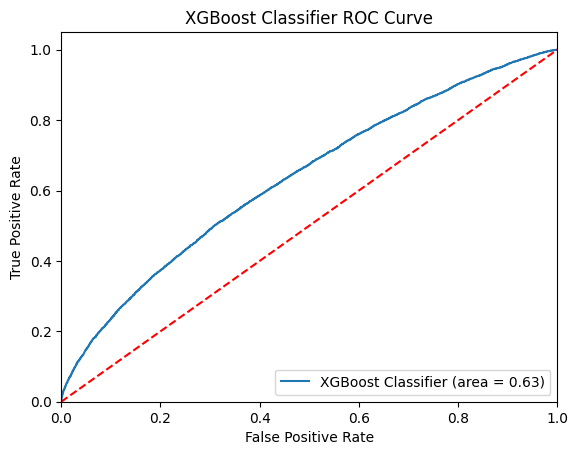

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred = xg5.predict(x_test)
GBR_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % GBR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(X_test.shape)
print(y_test.shape)

(32012, 371)
(32012,)


In [ ]:
# (y_test.reset_index(drop=True).loc[X_test['buy_total_freq'] >= 4000, :] == 1)
k = 7000
out = y_test.reset_index(drop=True).loc[X_test['buy_total_freq'] >= k]
out1 = y_test.reset_index(drop=True).loc[X_test['buy_total_freq'] >= k]
# out1 = y_test.reset_index(drop=True).loc[X_test['buy_total_freq'] >= k]
out1.loc[:] = 1
print(classification_report(out, out1))
print(f"Confusion Matrix:\n {confusion_matrix(out, out1)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.58      1.00      0.74        21

    accuracy                           0.58        36
   macro avg       0.29      0.50      0.37        36
weighted avg       0.34      0.58      0.43        36

Confusion Matrix:
 [[ 0 15]
 [ 0 21]]


看特徵

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

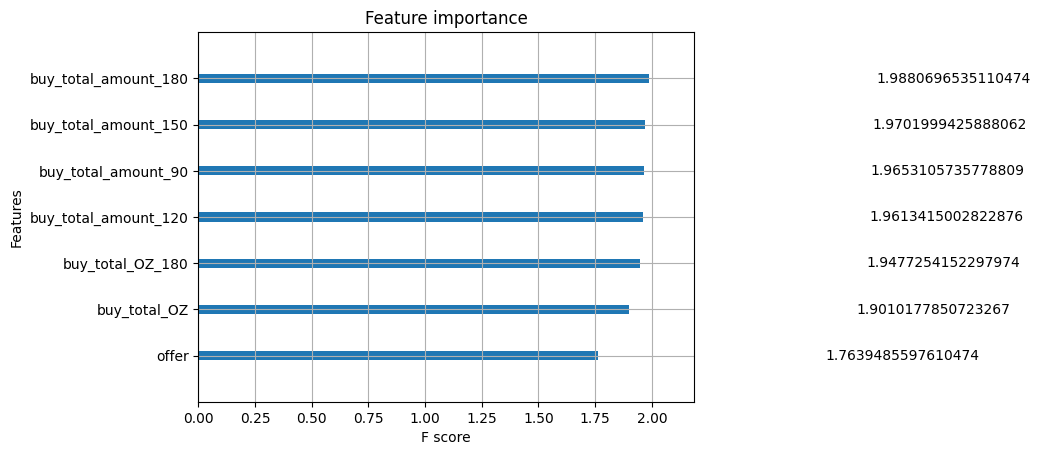

In [ ]:
xgb.plot_importance(xg5 , max_num_features = 20, importance_type = 'gain')

In [ ]:
import matplotlib.pyplot as plt
plot_tree(xg5, fmap='', num_trees=0, rankdir='UT', ax=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(xg5, num_trees = 5, ax=ax)
plt.show()

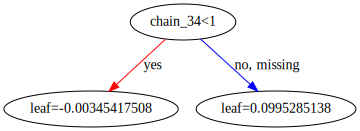

In [ ]:
xgb.to_graphviz(xg5)

In [ ]:
format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(xg5)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render(dirThis + 'xgboostTREE1', format = format)

### 存模型

In [ ]:
xg5.save_model(dirThis + 'withoutEncoderrr.json')

### 存取模型

In [ ]:
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model(dirThis + 'ordinalEncoderstdFULL.json')

In [ ]:
# model_xgb_2 = xg5
x_test = xgb.DMatrix(X_test)
y_test1 = y_test
pred = model_xgb_2.predict(x_test)
# print(sum(pred) / len(pred))
pred = np.around(pred,0).astype(int)
print('Test Result:\n')
print(f"Accuracy Score: {accuracy_score(y_test1, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test1, pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test1, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test1, pred)*100:.2f}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, pred)}")

In [ ]:
x_test = xgb.DMatrix(trainTest)
y_test1 = targetTest
pred = model_xgb_2.predict(x_test)
# print(sum(pred) / len(pred))
pred = np.around(pred,0).astype(int)
print(f"Accuracy Score: {accuracy_score(y_test1, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test1, pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test1, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test1, pred)*100:.2f}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, pred)}")

In [ ]:
predd = xg5.predict(xgb.DMatrix(trainTest))

In [ ]:
pr = pd.DataFrame(predd, columns = ['prediction'])
pr = np.around(pr, 0).astype(int)

In [ ]:
th = pd.read_csv(dirThis + 'trainHistory.csv')
predTrain = pd.concat([th['id'], trainTest, pr, targetTest], axis = 1)

In [ ]:
predTrue = predTrain[predTrain['prediction'] == 1]
predFalse = predTrain[predTrain['prediction'] == 0]

In [ ]:
np.unique(np.array(pr))

In [ ]:
y_pred == 0

In [ ]:
predd = []
for i in range(len(pr)) :
  predd.append(pr.iloc[i, :].values[0])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(trainTest)
zData = pca.transform(trainTest)
y_pred = pr['prediction']
color=['red', 'blue']
fig, axi1=plt.subplots(1)
axi1.set_xlim([-20000, 50000])
axi1.set_ylim([-20000, 20000])
for i in range(2):
    axi1.scatter(zData[y_pred==i, 0], zData[y_pred==i, 1],
               marker='o',
               s=8,
               c=color[i])

# CNN Test

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
cnnTrain = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1, 1))
cnnTest = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1, 1))

In [ ]:
cnn = keras.Sequential(name = 'cnn')
cnn.add(layers.Conv2D(32, (3, 1), activation = 'relu', input_shape = (X_train.shape[1], 1, 1)))

cnn.add(layers.Conv2D(64, (3, 1), activation = 'relu'))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation = 'relu'))
cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(2, activation ='softmax'))

keras.utils.plot_model(cnn, show_shapes = True)

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
cnn.compile(optimizer = 'Adam',
            loss = keras.losses.sparse_categorical_crossentropy,
            metrics = ['accuracy'])

cnn.fit(cnnTrain, y_train, epochs = 50)

In [ ]:
import numpy as np

predict_x = cnn.predict(cnnTest)
classes_x = np.argmax(predict_x, axis = 1)
print(np.mean(classes_x == np.array(y_test)))
print(np.sum(classes_x))

# KNN Test (待補)

找k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
x = X_train
y = y_train
k_range = range(1, 31)
k_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=6, scoring='accuracy')
    k_error.append(1 - scores.mean())

plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

Train

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 11


h = .02  

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

# Trans Data Into Kaggle

In [11]:
dtest = xgb.DMatrix(newdata.getKaggle().drop("offerdate", axis = 1))

In [ ]:
newdata.getKaggle()

## Predicted

### Cate

In [ ]:
y_pred = xg5.predict_proba(test)

### Prob

In [13]:
y_pred = xg5.predict(dtest)

### Inverse Predicted

In [ ]:
yy = np.ones(np.array(y_pred).shape) - np.array(y_pred)

In [ ]:
test1 = xgb.DMatrix(test)
y_pred = xg5.predict(test1)

In [ ]:
np.var(y_pred)

## Trans Submission

In [ ]:
a = pd.DataFrame(test['id'], columns = ['id'])
b = pd.DataFrame(y_pred[:, 1], columns = ['repeatProbability'])
c = pd.concat([a, b],axis=1)
testHistory = pd.read_csv(r'/content/drive/MyDrive/1經濟學/專題/testHistory.csv')
id = testHistory['id']
out = pd.merge(id, c, on = 'id', how = 'outer')
output = out.fillna(0)

k = 20
output.to_csv(f'/content/drive/MyDrive/1經濟學/專題/submission/submission{k}.csv', index = False)

new

In [30]:
# testHistory = pd.read_csv(r'/content/drive/MyDrive/1經濟學/專題/testHistory.csv')
output = pd.concat([newdata.getKaggle().reset_index()['id'], pd.DataFrame( \
        xg5.predict(xgb.DMatrix( \
          newdata.getKaggle().drop("offerdate", axis = 1))), 
          columns = ['repeatProbability'])], axis = 1)
k = 34
output.to_csv(f'/content/drive/MyDrive/1經濟學/專題/submission/submission{k}.csv', index = False)

In [ ]:
sum(output['repeatProbability']) / len(output['repeatProbability'])

0.30647435089862046

# Clustering (Test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
stData = predTrue.iloc[:, 1:-2]
stData

In [ ]:
silhouette = []
for i in range(2, 8):
    tryKmeans = KMeans(n_clusters = i, n_init = 10).fit(stData)
    silhouette.append(silhouette_score(stData, tryKmeans.labels_))
    print(str(i) + ' step, finished!')

plt.plot(range(2, 30), silhouette)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(stData)
zData = pca.transform(stData)

In [ ]:
tryKmeans = KMeans(n_clusters = 5, max_iter = 1000, tol = 1e-8, algorithm = 'elkan').fit(zData)

In [ ]:
y_pred = tryKmeans.labels_   
centtrod = tryKmeans.cluster_centers_
color=['red', 'pink', 'orange', 'gray', 'blue']
fig, axi1=plt.subplots(1)
for i in range(5):
    axi1.scatter(zData[y_pred==i, 0], zData[y_pred==i, 1],
               marker='o',
               s=8,
               c=color[i])
axi1.scatter(centtrod[:,0], centtrod[:,1], marker='x', s=100, c='black')

In [ ]:
tryKmeans.cluster_centers_